## Numpy

In [1]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [12]:
import random
import time
import numpy as np

normal_random = [random.randint(0, 10000) for i in range(10000)]
normal_begin = time.perf_counter()
for i in range(len(normal_random)):
    normal_random[i] += 1
normal_end = time.perf_counter()
print(f"normal_random time: {normal_end - normal_begin}")

numpy_random = np.random.randint(0, 10000, size=10000)
numpy_begin = time.perf_counter()
numpy_random += 1
numpy_end = time.perf_counter()
print(f"numpy_random time: {numpy_end - numpy_begin}")

normal_random time: 0.0030485000002045126
numpy_random time: 8.040000011533266e-05


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [16]:
from math import sin, cos
import random
import time
import numpy as np


normal_random = [random.randint(0, 10000) for i in range(10000)]
normal_begin = time.perf_counter()
for x in normal_random:
    _ = sin(x) + cos(x)
normal_end = time.perf_counter()
print(f"normal_random time: {normal_end - normal_begin}")

numpy_random = np.random.randint(0, 10000, size=10000)
numpy_begin = time.perf_counter()
_ = np.sin(numpy_random) + np.cos(numpy_random)
numpy_end = time.perf_counter()
print(f"numpy_random time: {numpy_end - numpy_begin}")

normal_random time: 0.00889999999981228
numpy_random time: 0.0009623000000829052


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [36]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

def cube_sum_faster(x):
    # return np.sum(np.power(np.array(x), 3))  # 0.10570169999982681
    return np.sum(np.array(x) ** 3)  # 0.08111879999978555

def almost_variance_faster(x):
    numpy_array = np.array(x)
    sum = np.sum(numpy_array)
    len = numpy_array.shape[0]
    m = sum / len
    return np.divide((numpy_array - m) ** 4, len)


x = np.random.randint(0, 10, size=int(1e7))

cube_begin = time.perf_counter()
cube_sum(x)
cube_end = time.perf_counter()

cube_faster_begin = time.perf_counter()
cube_sum_faster(x)
cube_faster_end = time.perf_counter()

print(f"cube_sum time: \t\t\t\t\t{cube_end - cube_begin}\ncube_sum_faster time: \t\t\t{cube_faster_end - cube_faster_begin}")

variance_begin = time.perf_counter()
almost_variance(x)
variance_end = time.perf_counter()

print()

variance_faster_begin = time.perf_counter()
almost_variance_faster(x)
variance_faster_end = time.perf_counter()

print(f"almost_variance time: \t\t\t{variance_end - variance_begin}\nalmost_variance_faster time: \t{variance_faster_end - variance_faster_begin}")


cube_sum time: 					4.94654969999965
cube_sum_faster time: 			0.07882449999988239

almost_variance time: 			13.322635100000298
almost_variance_faster time: 	0.994205200000124


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [18]:
np.arange(1, 11).reshape(10, 1) * np.arange(1, 11)

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [23]:
import random
array = np.random.rand(10, 5) * random.randint(1, 10)


array([[6.27606663, 4.19322629, 0.38608152, 5.81636402, 2.88223014],
       [3.834157  , 2.41927383, 1.80421983, 1.42936183, 8.09794788],
       [8.30243848, 1.35009853, 2.93970743, 6.2698767 , 8.28303554],
       [5.6259824 , 1.23093654, 6.99746759, 3.31168929, 4.90099574],
       [8.99548966, 7.94233411, 5.05356854, 7.06300613, 1.06074727],
       [2.87198586, 8.09245539, 4.21319914, 2.03366398, 2.53346698],
       [6.12283528, 1.76971216, 1.08082528, 3.99416305, 8.19179557],
       [0.73636837, 5.61808111, 6.43493484, 8.44792107, 7.07058892],
       [5.30620606, 6.23772704, 7.36851059, 0.57824147, 6.13600865],
       [3.8333236 , 8.98298078, 2.35686013, 6.27839093, 5.24049446]])

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [13]:
def poly(x, a: np.ndarray):
    return np.sum(np.power(x, np.arange(a.shape[0])) * a)

poly(3, np.arange(3))

21

## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

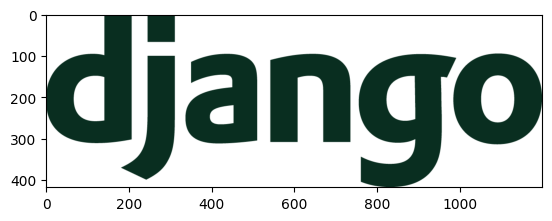

In [11]:
img = mpimg.imread('images/django.png')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

In [ ]:
# cmap=gray czy cos w ten desen, bo inaczej neonowe wyswietla

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$